### 1. Load data

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB # naive Bayes
from sklearn.linear_model import SGDClassifier # SVM
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [25]:
train_fpath = '/home/veera/LST_project/toy_data/train_data.csv'
test_fpath = '/home/veera/LST_project/toy_data/test_data.csv'
labels_col_name = 'Label'
id_col_name = 'id_str'

def download_from_csv(filename):
    # Helper for creating a matrix (ndarray) out of csv data
    df = pd.read_csv(filename, header=0, index_col=id_col_name)
    features = df.drop(labels_col_name, axis=1).values
    labels = df[labels_col_name].values

    return features, labels

X_train, y_train = download_from_csv(train_fpath)
X_test, y_test = download_from_csv(test_fpath)

print(X_train.shape, X_test.shape)

(146, 222) (49, 222)


### 2. Explorative data analysis

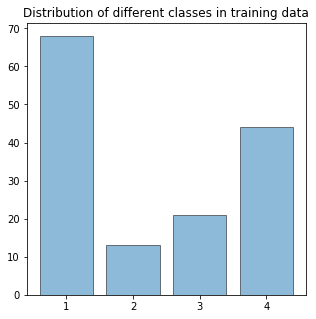

In [26]:
# visualize class distribution
fig1, ax = plt.subplots(1, 1, figsize=(5, 5))
hist = ax.hist(y_train, bins=np.arange(0.5, 5.5, 1), alpha=0.5, ec='black', rwidth=0.8)
ax.xaxis.set_ticks([i for i in range(1, 5)])
ax.set_title('Distribution of different classes in training data')

plt.show()

### 3. Fit model 

In [29]:
#classifier = MultinomialNB()
classifier = SGDClassifier()

classifier.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

### 4. Validate

In [33]:
# Prediction accuracy score for testing data
print("Score: %0.2f" % classifier.score(X_test, y_test))

# Cross-validation
X = np.vstack((X_train, X_test))
y = np.hstack((y_train, y_test))
cv_scores = cross_val_score(classifier, X, y)
print("Cross-validation accuracy: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

Score: 0.55
Cross-validation accuracy: 0.50 (+/- 0.15)
